In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
read_df = pd.read_parquet('twitter_data.parquet')
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
0,2021-06-20T21:33:30.000Z,1406726930888540160,1406726930888540160,2981738470,RT @davidlohner: #IchbinHanna und schreibe auc...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406714909258362...",['IchbinHanna'],retweet,de
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
2,2021-06-20T20:50:42.000Z,1406716159064485895,1406716159064485895,2981738470,RT @DrKEichhorn: Wieder ein Artikel ohne echte...,16,0,0,0,"[{'type': 'retweeted', 'id': '1406697315159752...",[],retweet,de
3,2021-06-20T17:56:03.000Z,1406672208056012807,1406672208056012807,2981738470,RT @chrismeyer2203: So sieht es aus ⬇️ oder an...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406175728190865...",[],retweet,de
4,2021-06-20T17:53:00.000Z,1406671439328055301,1406671439328055301,2981738470,RT @steffen_siegel: Modelle einer Universitäts...,17,0,0,0,"[{'type': 'retweeted', 'id': '1406666454368493...",[],retweet,de


In [4]:
read_df = read_df.drop_duplicates(subset=['tweet_id'])
read_df.shape

(181552, 13)

In [5]:
read_df['tweet_language'].value_counts()

de         159811
en          18586
sv           1296
nl            345
fr            314
tl            195
cy            181
it            166
id            159
unknown       120
es             51
ja             49
fi             33
no             28
pl             28
sw             24
pt             22
af             19
et             17
ca             16
so             14
da             14
tr             11
ro             11
cs              7
ar              7
sl              6
hr              5
sk              4
vi              3
hi              2
fa              2
hu              2
th              1
sq              1
ru              1
lv              1
Name: tweet_language, dtype: int64

In [6]:
read_df = read_df.loc[read_df['tweet_type'] != 'retweet']
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,☝️⬇️ #IchbinHanna #PeerReview https://t.co/PFN...,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread ⬇️ about the cruel #precarity in German...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread ⬇️ zu #Machtmissbrauch in der...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [7]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

read_df.text = read_df.text.apply(remove_emojis)
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,#IchbinHanna #PeerReview https://t.co/PFNrovEOAS,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel #precarity in German #...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu #Machtmissbrauch in der #...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [8]:
def remove_mentions_and_tags(text): #Removing mentions and hashtags and url
    text = re.sub(r'@\S*', '', text)
    text = re.sub(r'http\S+', '', text)
    return re.sub(r'#\S*', '', text)

read_df.text = read_df.text.apply(remove_mentions_and_tags)

In [9]:
read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations

C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\2773504966.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations


In [10]:
read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number

C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\2955464902.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number


In [11]:
#English

In [12]:
en_df = read_df[read_df.tweet_language == 'en']
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en


In [13]:
!pip install HanTa

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
#getting nouns and adjectives
import nltk
nltk.download('punkt')
from HanTa import HanoverTagger as ht

en_tagger = ht.HanoverTagger('morphmodel_en.pgz')

def en_noun(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in en_tagger.tag_sent(words,taglevel= 1) if pos == 'NN']
  return tokens

def en_adj(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in en_tagger.tag_sent(words,taglevel= 1) if pos == 'ADJ']
  return tokens

en_df['en_noun'] = en_df.text.apply(en_noun)
en_df['en_adj'] = en_df.text.apply(en_adj)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\2603410340.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['en_noun'] = en_df.text.apply(en_noun)
C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\2603410340.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['en_adj'] = en_df.text.apply(en_adj)


In [15]:
en_df.head()


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,"[Thread, debate]",[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,"[Thread, video, Ministry, Education, Research,...",[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,"[job, impact, life]",[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,"[post, comment, job, Ministry, Education, Rese...",[]


In [16]:
en_df.en_adj.unique

<bound method Series.unique of 11        []
105       []
125       []
215       []
238       []
          ..
308092    []
308243    []
308292    []
308293    []
308323    []
Name: en_adj, Length: 6129, dtype: object>

In [17]:
en_df.en_noun.unique

<bound method Series.unique of 11                                         [Thread, debate]
105       [Thread, video, Ministry, Education, Research,...
125                                     [job, impact, life]
215                                                      []
238       [post, comment, job, Ministry, Education, Rese...
                                ...                        
308092                                                   []
308243    [host, seminar, postdoc, nittygritty, law, sem...
308292                                         [rate, cant]
308293                                              [right]
308323         [fellow, profs, problem, collection, action]
Name: en_noun, Length: 6129, dtype: object>

In [18]:
def to_lowercase(text):
  token = []
  for i in range(len(text)):
    val = text[i].lower()
    token.append(val)
  return token

en_df.en_noun = en_df.en_noun.apply(to_lowercase)

en_df.head()

C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\2124371995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_noun = en_df.en_noun.apply(to_lowercase)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,"[thread, debate]",[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,"[thread, video, ministry, education, research,...",[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,"[job, impact, life]",[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,[],[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,"[post, comment, job, ministry, education, rese...",[]


In [19]:
en_df.en_adj = en_df.en_adj.apply(to_lowercase)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\736935701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_adj = en_df.en_adj.apply(to_lowercase)


In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
english_stop_words.append('amp')

def stop_word_en_removal(x):
    return ' '.join([w for w in x if not w in english_stop_words])

en_df.en_noun = en_df.en_noun.apply(stop_word_en_removal)
en_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\1942927101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_noun = en_df.en_noun.apply(stop_word_en_removal)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,[]
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,[]
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,[]
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,[]


In [21]:
en_df.en_adj = en_df.en_adj.apply(stop_word_en_removal)
en_df.head()

C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\3399689501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df.en_adj = en_df.en_adj.apply(stop_word_en_removal)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,


In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
#lemmatizer
import nltk
import pandas as pd

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w,'n') for w in w_tokenizer.tokenize(text)]

def lemmatize_text_adj(text):
  return [lemmatizer.lemmatize(w,'a') for w in w_tokenizer.tokenize(text)]


en_df['text_lemmatized_noun'] = en_df.en_noun.apply(lemmatize_text)
# en_df['text_lemmatized_adj'] = en_df.en_noun.apply(lemmatize_text_adj)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\2299315245.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['text_lemmatized_noun'] = en_df.en_noun.apply(lemmatize_text)


In [24]:
en_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,en_noun,en_adj,text_lemmatized_noun
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel in German The debate...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en,thread debate,,"[thread, debate]"
105,2021-06-12T21:15:23.000Z,1403823267115376649,1403823267115376649,1132055796571877376,Thread summarizing a video by the German Fede...,1,0,9,1,"[{'type': 'quoted', 'id': '1403006909079293953'}]","['IchbinHanna', 'academia', 'Germany', 'toxica...",original,en,thread video ministry education research outcr...,,"[thread, video, ministry, education, research,..."
125,2021-06-11T22:32:52.000Z,1403480380632674307,1403480380632674307,1132055796571877376,On job in German and its impact on life and...,0,0,1,0,"[{'type': 'quoted', 'id': '1402963684691955714'}]","['precarity', 'academia', 'family', 'mentalhea...",original,en,job impact life,,"[job, impact, life]"
215,2021-06-10T19:07:52.000Z,1403066401611472902,1403066401611472902,1132055796571877376,,0,0,1,0,"[{'type': 'quoted', 'id': '1403059508021284864'}]","['AcademicTwitter', 'acertaindegreeofflexibili...",original,en,,,[]
238,2021-06-10T15:04:44.000Z,1403005214974640143,1403005214974640143,1132055796571877376,German researchers without a permanent post i...,7,0,15,0,"[{'type': 'quoted', 'id': '1402994337009442820'}]","['IchbinHanna', 'academia', 'AcademicTwitter',...",original,en,post comment job ministry education research s...,,"[post, comment, job, ministry, education, rese..."


Document-Term Matrix

In [25]:
dict_docs =  en_df.text_lemmatized_noun.to_dict()
# print(dict_docs)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vects = vect.fit_transform(en_df.en_noun)

newdf = pd.DataFrame(vects.todense())
newdf.columns = vect.get_feature_names()

tdm = newdf.T
tdm.columns = ['Doc '+str(i) for i in range(newdf.shape[0])]
tdm['total_count'] = tdm.sum(axis=1)

tdm = tdm.sort_values(by = 'total_count', ascending=False)
print(tdm.drop(columns=['total_count']).head())

c:\Users\Moinam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


          Doc 0  Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  \
academia      0      0      0      0      0      0      1      0      0   
research      0      1      0      0      1      0      0      0      0   
system        0      0      0      0      0      0      0      0      0   
time          0      0      0      0      0      0      0      0      0   
job           0      0      1      0      1      0      0      0      0   

          Doc 9  ...  Doc 6119  Doc 6120  Doc 6121  Doc 6122  Doc 6123  \
academia      0  ...         1         0         0         0         0   
research      0  ...         0         0         0         0         0   
system        1  ...         0         0         0         0         0   
time          0  ...         0         0         0         0         0   
job           1  ...         0         0         0         1         0   

          Doc 6124  Doc 6125  Doc 6126  Doc 6127  Doc 6128  
academia         0         0         0     

In [27]:
tdm

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 6120,Doc 6121,Doc 6122,Doc 6123,Doc 6124,Doc 6125,Doc 6126,Doc 6127,Doc 6128,total_count
academia,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,811
research,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,481
system,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,431
time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,357
job,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imaginingamporganising,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
imher,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
immobility,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
immune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
tdm = tdm.drop(columns=['total_count'], axis =1)
tdm

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 6119,Doc 6120,Doc 6121,Doc 6122,Doc 6123,Doc 6124,Doc 6125,Doc 6126,Doc 6127,Doc 6128
academia,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
research,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
system,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
job,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imaginingamporganising,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imher,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
immobility,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
immune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dtm = tdm.to_numpy()
print(type(dtm))

<class 'numpy.ndarray'>


In [30]:
!pip install lda

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import lda
# tdm_lda = lda.LDA(n_topics = 10, n_iter = 1000, random_state=42)
# vocab = en_df.en_noun
# # tdm_lda.fit(dtm)
# n_topics = []
# log_likelihoods = []
# lda_models = []

# for i in range(2,41):
#     n_topics.append(i)

# for i in n_topics:
#     tdm_lda = lda.LDA(n_topics=i, n_iter=1000, random_state=42)
#     tdm_lda.fit(dtm)
#     log_likelihoods.append(tdm_lda.loglikelihoods_[99])
#     lda_models.append(tdm_lda)

# topic_word = tdm_lda.topic_word_
# n_top_words = 15
# for i, topic_dist in enumerate(topic_word):
#     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    # print('Topic {}: {}'.format(i, ' '.join(topic_words)))

In [32]:
# plt.plot(n_topics, log_likelihoods)
# plt.xticks(np.arange(min(n_topics), max(n_topics)+1, 2))
# plt.gca().invert_yaxis()
# plt.title('Selection of Number of Topics')
# plt.xlabel(' Number of Topics')
# plt.ylabel(' Log Likelihoods')
# plt.show()


In [33]:
def generate_tokens(tweet):
  words = []
  for i in range(len(tweet)):
    word = tweet[i]
  # using the if condition because we introduced extra spaces during text cleaning
    if word != '':
      words.append(word)
  return words


#storing the generated tokens in a new column named 'words'
en_df['tokens'] = en_df.text_lemmatized_noun.apply(generate_tokens)


C:\Users\Moinam\AppData\Local\Temp\ipykernel_26504\1413309341.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['tokens'] = en_df.text_lemmatized_noun.apply(generate_tokens)


In [34]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

def create_dictionary(words):
  return corpora.Dictionary(words)


def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus

#passing the dataframe column having tokens as the argument
en_id2word = create_dictionary(en_df.tokens)

#passing the dataframe column having tokens and dictionary
en_corpus = create_document_matrix(en_df.tokens, en_id2word)


In [35]:
en_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=en_corpus, id2word=en_id2word, num_topics=4, random_state=42)


In [36]:
def get_doc_topic(corpus, model):
    doc_topic = []
    for doc in range(len(corpus)):
        doc_topic.append(
            {'Tweet': en_df.iloc[doc].text, 'Hashtags': en_df.iloc[doc].hashtags, 'Topic_Probability': model.__getitem__(corpus[doc], eps=0)})
    return doc_topic


doc_topic = get_doc_topic(en_corpus, en_lda_model)
doc_topic_df = pd.DataFrame(doc_topic)

In [37]:
def calc_doc_topic_count(doc_topic):
    count_dict = {
        '1': 0,
        '2': 0,
        '3': 0,
        '4': 0
    }
    for topic in doc_topic:
        prob = topic['Topic_Probability']
        big = -99999
        for p in prob:
            if p[1] > big:
                big = p[1]
                max_top = p[0]
        if max_top == 0:
            count_dict['1'] +=1
        elif max_top == 1:
            count_dict['2'] += 1
        elif max_top == 2:
            count_dict['3'] += 1
        elif max_top == 3:
            count_dict['4'] += 1
    # count_dict_list = []
    # for i in range(4):
    #     top_str = "Topic " + str(i+1)
    #     top_ind = str(i)
    #     count_dict_list.append({top: count_dict[top_ind]})
    return count_dict


count_dict = calc_doc_topic_count(doc_topic)

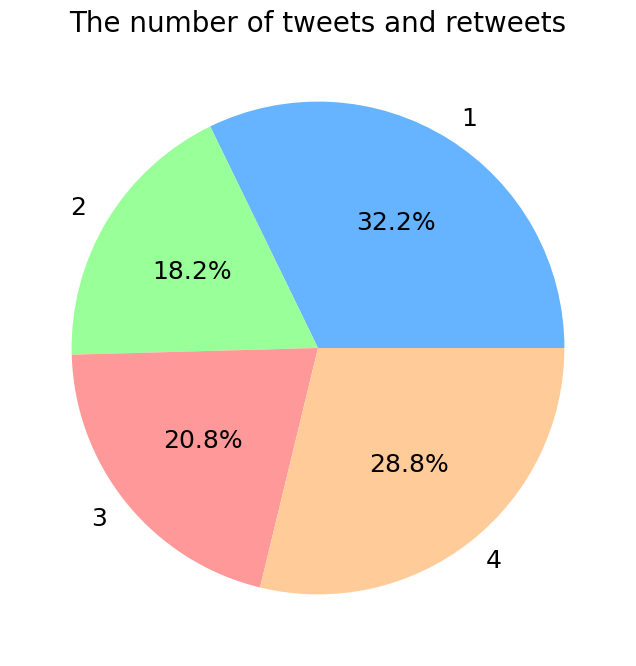

In [38]:
topics = ['1', '2', '3', '4']
count = [count_dict['1'], count_dict['2'], count_dict['3'], count_dict['4']]
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99']
plt.pie(count, labels=topics,
        colors=colors, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('The number of tweets and retweets', fontsize=20)
#plt.legend(data_pie.tweets_count,fontsize=20)
plt.show()


In [39]:
doc_topic_df.head()

,Tweet,Hashtags,Topic_Probability
0,Thread about the cruel in German The debate...,"['precarity', 'academia', 'IchbinHanna', 'Acad...","[(0, 0.4267188), (1, 0.40560994), (2, 0.083853..."
1,Thread summarizing a video by the German Fede...,"['IchbinHanna', 'academia', 'Germany', 'toxica...","[(0, 0.028408755), (1, 0.57227606), (2, 0.3680..."
2,On job in German and its impact on life and...,"['precarity', 'academia', 'family', 'mentalhea...","[(0, 0.06707466), (1, 0.06823183), (2, 0.28062..."
3,,"['AcademicTwitter', 'acertaindegreeofflexibili...","[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]"
4,German researchers without a permanent post i...,"['IchbinHanna', 'academia', 'AcademicTwitter',...","[(0, 0.03218517), (1, 0.1955625), (2, 0.738019..."


In [40]:
def print_beauty(df):
    for i in range(6,10):
        print('Tweet:',df.iloc[i].Tweet)
        print('Hashtags:', df.iloc[i].Hashtags)
        print('Topic_Probability:', df.iloc[i].Topic_Probability)
        print("----------------------------------------------------------------\n")


print_beauty(doc_topic_df)


Tweet: Like so many  Ive learned that I am a good enough researcher to stay in academia but what the  does is not to select the best candidates It also does not train researchers to become the best candidates deserving of permanent jobs
Hashtags: ['IchbinHanna', 'WissZeitVG']
Topic_Probability: [(0, 0.35916924), (1, 0.085244715), (2, 0.46850178), (3, 0.08708428)]
----------------------------------------------------------------

Tweet: For those who dont read German

The response by the ministry of education to the outpouring of stories and discussions regarding academic precarity  is unbelievably patronising and disrespectful
Hashtags: ['IchBinHanna']
Topic_Probability: [(0, 0.04297296), (1, 0.042300906), (2, 0.045084942), (3, 0.8696412)]
----------------------------------------------------------------

Tweet: So  proudly explains the advantages of the  to early carrer researchers as if they were preschool children This law is a great obstacle to many brilliant young minds and threaten

In [41]:
def get_topic_to_wordids(model):
    p = list()
    for topicid in range(model.num_topics):
        topic = model.state.get_lambda()[topicid]
        topic = topic / max(topic)  # normalize to probability dist
        p.append(topic)
    return p

def create_dict_word_topic(word_topic):
    word_topic_dict = []
    i = 0
    for topic in word_topic:
        prob_words = []
        for word_ind in range(len(topic)):
            if (topic[word_ind] >= 0.15):
                prob_words.append(en_id2word[word_ind])
        word_topic_dict.append({'Topic': (i+1), 'most_prob_words': prob_words})
        i+=1
    return word_topic_dict

word_topic = get_topic_to_wordids(en_lda_model)
word_topic_dict = create_dict_word_topic(word_topic)
word_topic_df = pd.DataFrame(word_topic_dict)


In [42]:
word_topic_df.head()

,Topic,most_prob_words
0,1,"[debate, research, job, academia, law, time, c..."
1,2,"[thread, discussion, research, post, situation..."
2,3,"[research, video, job, situation, academia, ar..."
3,4,"[research, job, life, situation, academia, pre..."


In [43]:
for i in range(4):
    print("Topic ", (i+1))
    print("Most Probable Word List: ", word_topic_df.iloc[i].most_prob_words)
    print("-------------------------------------------------------\n")


Topic  1
Most Probable Word List:  ['debate', 'research', 'job', 'academia', 'law', 'time', 'career', 'goal', 'science', 'perspective', 'link', 'rate', 'seminar', 'freelancer']
-------------------------------------------------------

Topic  2
Most Probable Word List:  ['thread', 'discussion', 'research', 'post', 'situation', 'academia', 'end', 'thing', 'time', 'work', 'contract', 'staff', 'professor', 'day', 'world', 'link', 'week', 'program', 'paper', 'click', 'reward', 'airdrop', 'telegram', 'channel', 'distribution', 'chat', 'chef', 'shark']
-------------------------------------------------------

Topic  3
Most Probable Word List:  ['research', 'video', 'job', 'situation', 'academia', 'article', 'time', 'future', 'lot', 'work', 'topic', 'student', 'employment', 'career', 'u', 'contract', 'lack', 'university', 'tenure', 'place', 'term', 'track', 'movement', 'postdoc', 'link', 'uk', 'anxiety', 'history', 'right', 'music', 'connection', 'message']
--------------------------------------

In [44]:
# !pip install pyldavis


In [45]:
import pyLDAvis.gensim_models
import pyLDAvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(en_lda_model,
                                     en_corpus,
                                     dictionary=en_lda_model.id2word)
vis


c:\Users\Moinam\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.079702  0.016850       1        1  30.986551
2     -0.098173 -0.132742       2        1  25.045114
0     -0.019263  0.159590       3        1  23.928725
1      0.197138 -0.043698       4        1  20.039610, topic_info=           Term        Freq       Total Category  logprob  loglift
955       music  212.000000  212.000000  Default  30.0000  30.0000
957       click  185.000000  185.000000  Default  29.0000  29.0000
1        thread  204.000000  204.000000  Default  28.0000  28.0000
31       system  348.000000  348.000000  Default  27.0000  27.0000
20     academia  637.000000  637.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
257         day   34.637111  110.461771   Topic4  -4.9780   0.4477
7      research   43.578096  335.029295   Topic4  -4.7484  -0.4322
85         work   39.334449  227.914932   Topic4  -4.8508  -0.1494
181   professor   29.592684  118.053864   Topic4  -5.1354   0.2238
430  experience   25.843871   59.909917   Topic4  -5.2709   0.7667

[259 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
20        1  0.298217  academia
20        2  0.069061  academia
20        3  0.517956  academia
20        4  0.113009  academia
1006      3  0.972348     admin
...     ...       ...       ...
35        1  0.606435      year
35        2  0.079414      year
35        3  0.295998      year
35        4  0.021658      year
700       3  0.913203     youve

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [46]:
doc_top_mat = en_lda_model[en_corpus]
print(doc_top_mat)
